In [1]:
from flowvae.app.wing.wing_api import Wing_api
import numpy as np
import os

In [2]:
api = Wing_api()

data_folder = 'D:\\DeepLearning\\202208Wing\\202310singlewing\\wing2\\data'
indexs = np.load(os.path.join(data_folder, 'wingindex.npy'))


In [9]:
test_input = np.take(indexs[1], list(range(1, 9)) + list(range(10, 31)))
wg = api.predict(test_input)

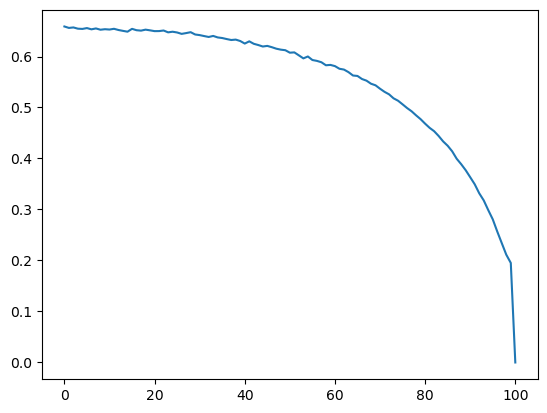

In [5]:
from matplotlib import pyplot as plt
plt.plot(range(101), api.info['3d_sld'][0].detach().cpu().numpy())

10 0.33212574292837094
30 0.9963772287851129
50 1.6606287146418546
70 2.3248802004985967
90 2.9891316863553383


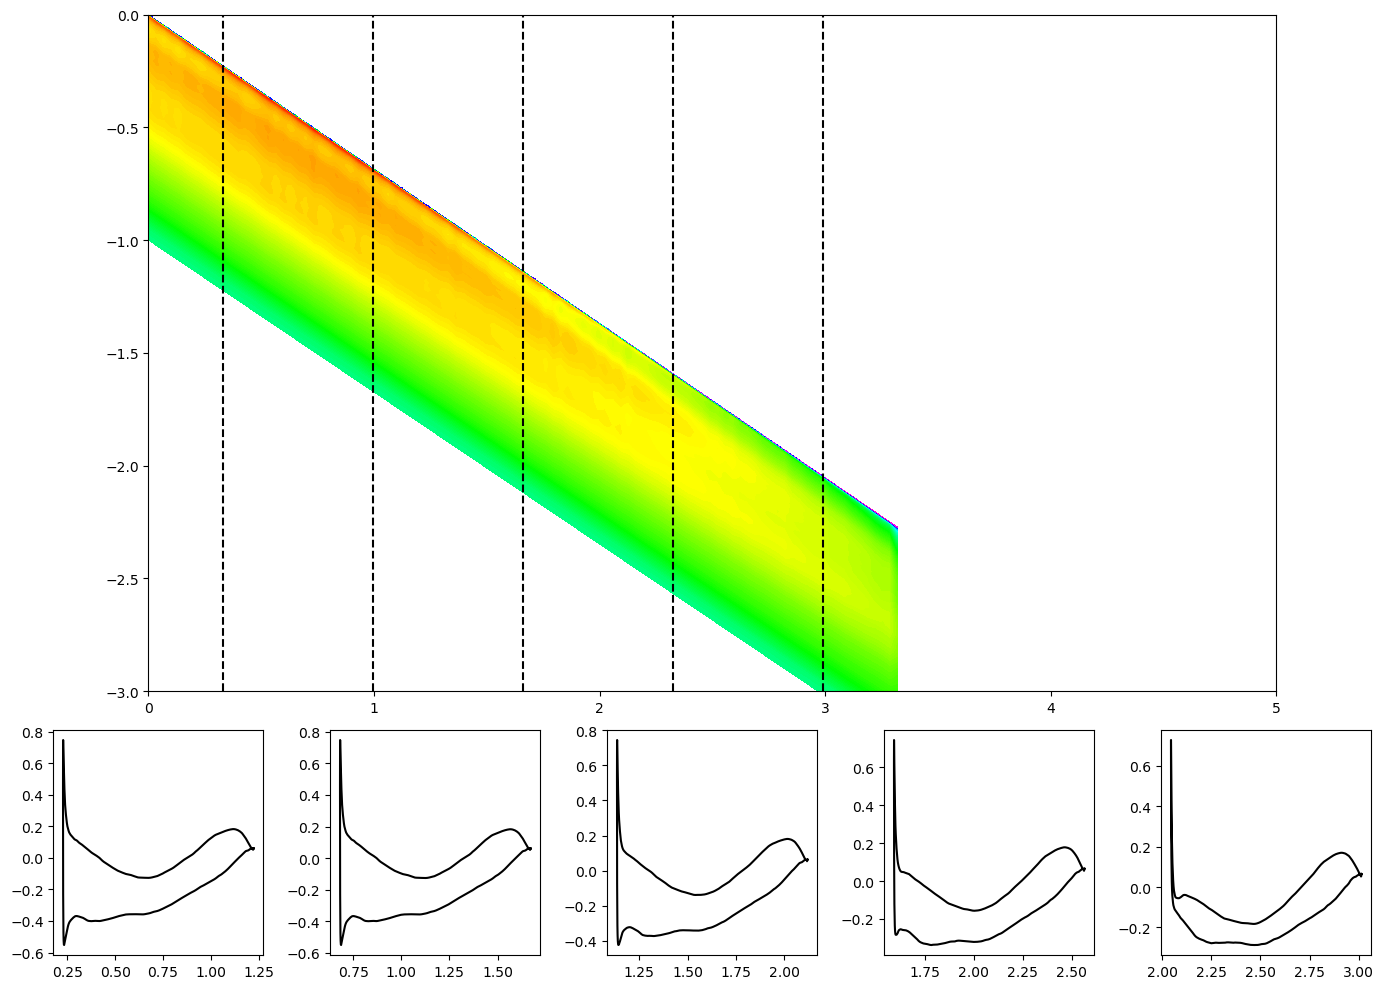

In [10]:
from cfdpost.wing.basic import Wing, KinkWing, plot_compare_2d_wing
wg1 = Wing()
wg1.read_formatted_geometry(test_input, ftype=1)
wg1.reconstruct_surface_grids(nx=161, nzs=[101])
wg1.read_formatted_surface(geometry=None, data=api.info['2d_corr'][0].detach().cpu().numpy(), isnormed=False)
wg1.plot_2d(['upper', 'full'], contour=9)


10 0.33212574292837094
30 0.9963772287851129
50 1.6606287146418546
70 2.3248802004985967
90 2.9891316863553383


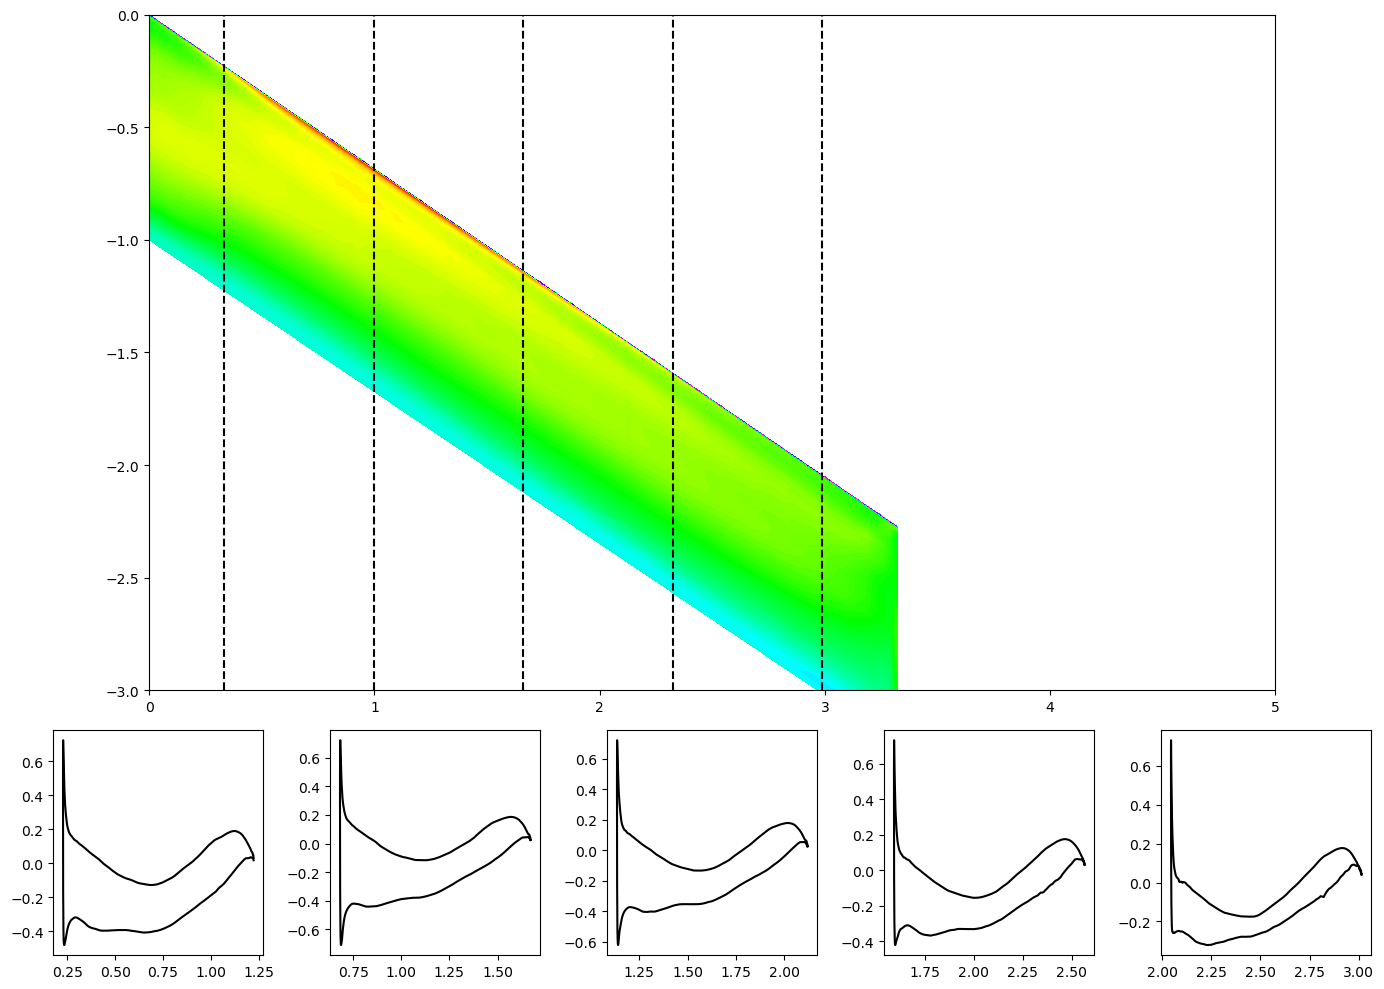

In [11]:
wg.plot_2d(['upper', 'full'], contour=9)

In [8]:
datas = np.load(os.path.join(data_folder, 'wing101.npy'))
print(datas.shape)

(1842, 6, 101, 321)


10 0.33212573528289796
30 0.996377205848694
50 1.6606286764144897
70 2.324880146980286
90 2.989131617546082


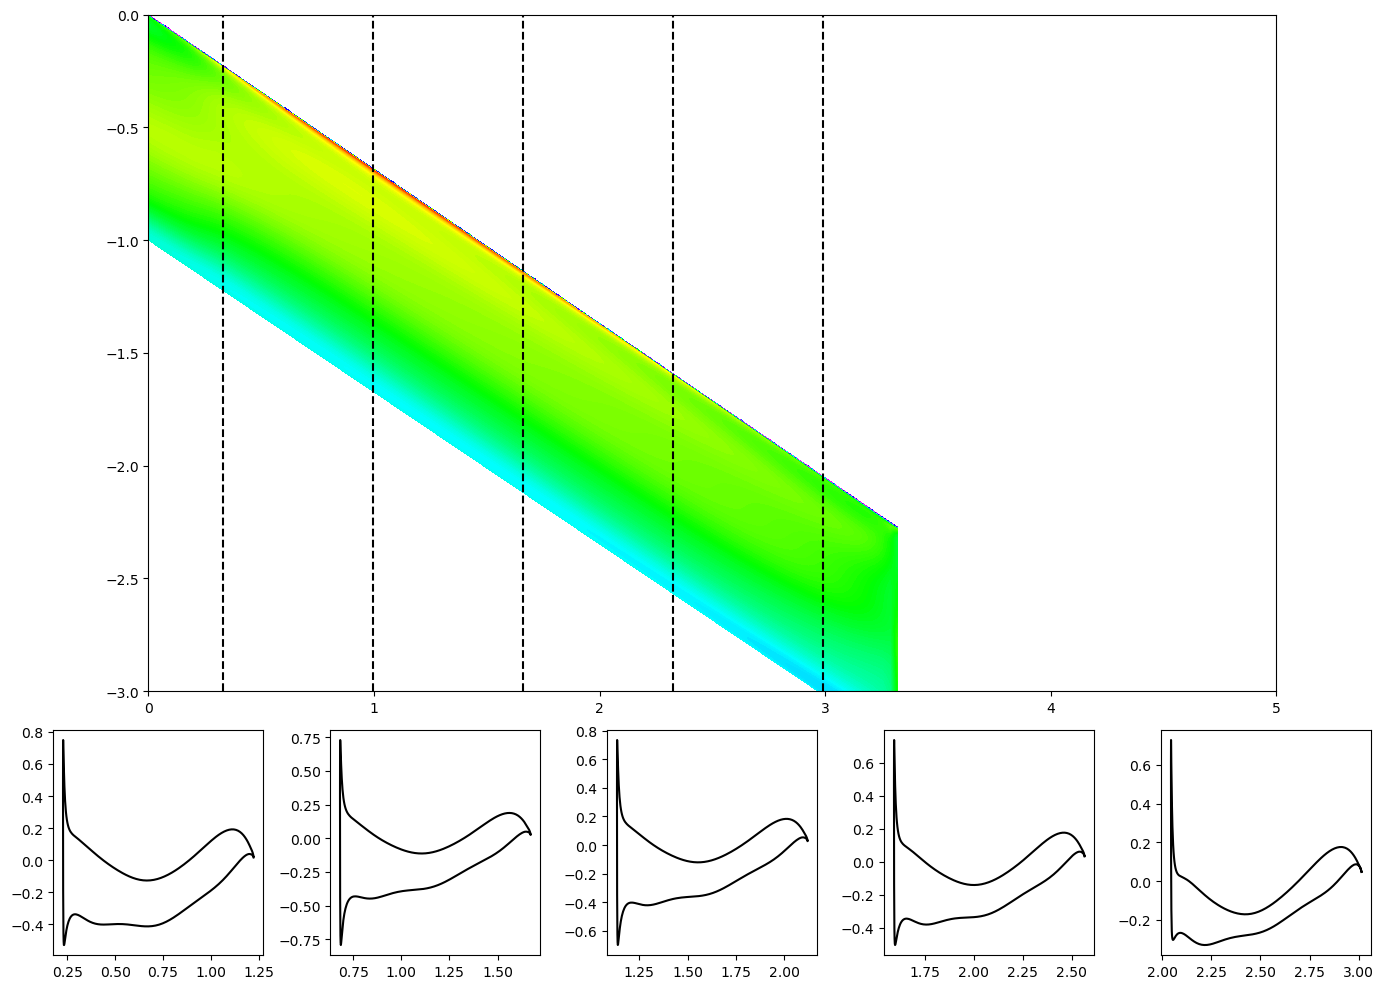

In [12]:
wg2 = Wing()
wg2.read_formatted_surface(geometry=datas[1][:3], data=datas[1][3:], isnormed=False)
wg2.plot_2d(['upper', 'full'], contour=9)